# Answer sheet for quiz : 12 Nov. 2022

### ชื่อ-สกุล :

รัฐวิชญ์ พัทรเจริญพงศ์

### รหัสนศ. :

65130701717

#### !!! อย่าลืม: เขียนอธิบาย code ในแต่ละขั้นตอนด้วยว่ากำลังทำอะไร

### ข้อที่ 1

##### 1.1 Find the distance of each pair without adjusting the scale of data

In [51]:
# ทำข้อมูลที่ให้มาในโจทย์ เปลี่ยนให้เป็น Data Frame เพื่อง่ายต่อการคำนวณ
import pandas as pd
df1 = pd.DataFrame(data = { 'Name':['Boy', 'Bob', 'Cat', 'Lisa', 'Peter'] ,
                            'Weight':[60,65,55,54,63],
                           'Salary':[62000,65000,38000,55000,40000] } )
df1
# df1 = DataFrame without adjusting the scale of data

,Name,Weight,Salary
0,Boy,60,62000
1,Bob,65,65000
2,Cat,55,38000
3,Lisa,54,55000
4,Peter,63,40000


ใช้หลักการ Euclidean distance = d(p,q)**2 = (q1-p1)**2+(q2-p2)**2

In [54]:
# คำนวณ ระยะทาง โดยใช้ สูตรใน Euclidean distance Dataframe
import numpy as np
df1['Dist'] = np.sqrt(((df1.loc[0, 'Weight']) - (df1['Weight']))**2 + ((df1.loc[0, 'Salary']) - (df1['Salary']))**2)
df1['Dist']

0        0.000000
1     3000.004167
2    24000.000521
3     7000.002571
4    22000.000205
Name: Dist, dtype: float64

##### Distance of each pair without adjusting the scale of data
##### 1     3000.004167 => Boy vs Bob
##### 2    24000.000521 => Bob vs Cat
##### 3     7000.002571 => Cat vs Lisa
##### 4    22000.000205 => Lisa vs Peter

##### 1.2 Adjust the scale of data before find the distance of each pair

In [55]:
import pandas as pd
df1adjust = pd.DataFrame(data = { #'Name':['Boy', 'Bob', 'Cat', 'Lisa', 'Peter'] ,
                            'Weight':[60,65,55,54,63],
                           'Salary':[62000,65000,38000,55000,40000] } )
df1adjust
# เตรียม Data เพื่อทำการ Adjust the scale of data before find the distance

,Weight,Salary
0,60,62000
1,65,65000
2,55,38000
3,54,55000
4,63,40000


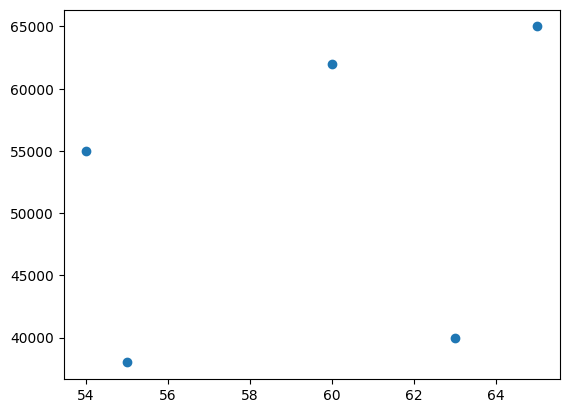

In [56]:
# จำลองการ Visualize data เพื่อ ดู Scale สังเกตว่า Y กับ X Scale หลอกตามาก
df1adjust.describe()
import matplotlib.pyplot as plt
plt.scatter(df1adjust['Weight'],df1adjust['Salary'])

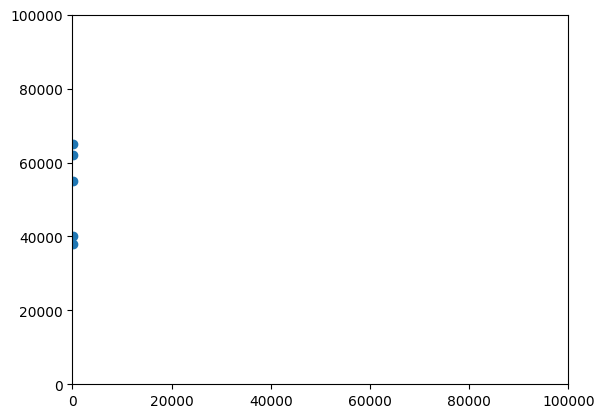

In [57]:
# ทำการปรับ Scale ให้ X กับ Y เท่ากัน
plt.xlim(0,100000)
plt.ylim(0,100000)
plt.scatter(df1adjust['Weight'],df1adjust['Salary'])
# จะเห็นเลยว่า data ไปกองอยู่วิเคราะไม่ได้ เพราะ คนละ Scale

In [60]:
# Define min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# นำเข้า MinMaxScaler lib เพื่อปรับ Scale

In [59]:
# transform data
scaled = scaler.fit_transform(df1adjust)
scaled

array([[0.54545455, 0.88888889],
       [1.        , 1.        ],
       [0.09090909, 0.        ],
       [0.        , 0.62962963],
       [0.81818182, 0.07407407]])

In [68]:
df_scaled = pd.DataFrame(scaled)
df_scaled
# แปลง Array เป็น Data Frame

,0,1
0,0.545455,0.888889
1,1.000000,1.000000
2,0.090909,0.000000
3,0.000000,0.629630
4,0.818182,0.074074


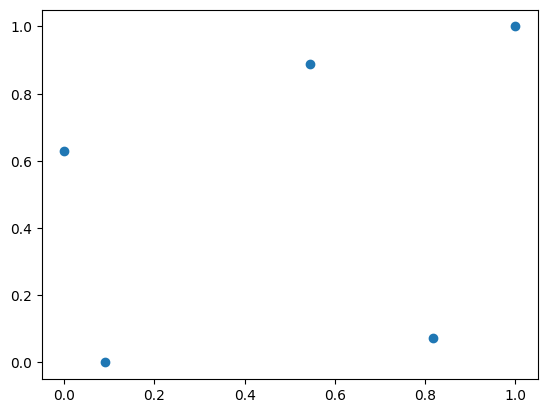

In [67]:
plt.scatter(df_scaled[0],df_scaled[1])
# จาก Graph จะเห็นได้เลยว่า วิเคราะได้ เพราะ scale เดียวกันละ

In [71]:
df_scaled.describe()
# min	0.000000	0.000000 ปรับเรียบร้อย
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       5 non-null      float64
 1   1       5 non-null      float64
dtypes: float64(2)
memory usage: 208.0 bytes


In [72]:
# คำนวณ ระยะทาง โดยใช้ สูตรใน Euclidean distance Dataframe
df_scaled['Dist'] = np.sqrt(((df_scaled.loc[0, 0]) - (df_scaled[0]))**2 + ((df_scaled.loc[0, 1]) - (df_scaled[1]))**2)
df_scaled['Dist']

0    0.000000
1    0.467929
2    0.998366
3    0.603934
4    0.859246
Name: Dist, dtype: float64

##### Distance of each pair after adjust the scale of data
##### 1    0.467929 => Boy vs Bob
##### 2    0.998366 => Bob vs Cat
##### 3    0.603934 => Cat vs Lisa
##### 4    0.859246 => Lisa vs Peter

### ข้อที่ 2

In [192]:
# อ่านค่าจาก File titanic.csv
import pandas as pd 
dfTitanic = pd.read_csv('titanic.csv')

In [193]:
# ดูข้อมูลว่าเป็นอย่างไร
dfTitanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [194]:
# ดูประเภทของข้อมูล
dfTitanic.info()
# สังเกตุว่ามี data ที่ null Age, Cabin

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [195]:
dfTitanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [196]:
# มาดูรายละเอียดเพิ่มเติมว่าข้อมูลใดที่ขาดหายไป
total = dfTitanic.isnull().sum().sort_values(ascending=False)
percent_1 = dfTitanic.isnull().sum()/dfTitanic.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0


In [197]:
dfTitanic.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [198]:
# ทำการ Data preprocessing => drop ‘PassengerId’ from the train set
dfTitanic = dfTitanic.drop(['PassengerId'], axis=1)

In [199]:
# แปลง Cabin to Deck ให้มีความหมาย
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [dfTitanic]
for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)
# we can now drop the cabin feature
dfTitanic = dfTitanic.drop(['Cabin'], axis=1)

In [200]:
dfTitanic.columns.values

array(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'Deck'], dtype=object)

In [201]:
# Filling Age Column the N/A value with mean of each group
data = [dfTitanic]
for dataset in data:
    mean = dfTitanic["Age"].mean()
    std = dfTitanic["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = dfTitanic["Age"].astype(int)
dfTitanic["Age"].isnull().sum()
dfTitanic["Age"]

0      22
1      38
2      26
3      35
4      35
       ..
886    27
887    19
888    26
889    26
890    32
Name: Age, Length: 891, dtype: int64

In [202]:
# Filling Embarked Column ด้วยค่าที่เป็นไปได้มากสุด => S
dfTitanic['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [203]:
# Filling Embarked Column ด้วยค่าที่เป็นไปได้มากสุด => S
common_value = 'S'
data = [dfTitanic]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [204]:
dfTitanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
 10  Deck      891 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 76.7+ KB


In [205]:
# Convert Fare To Int
data = [dfTitanic]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [206]:
# เอาชื่อ ออก
dfTitanic = dfTitanic.drop(['Name'], axis=1)

In [207]:
# Convert ‘Sex’ feature into numeric.
genders = {"male": 0, "female": 1}
data = [dfTitanic]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [208]:
# เอา Ticket ออก
dfTitanic = dfTitanic.drop(['Ticket'], axis=1)

In [209]:
# Convert ‘Embarked’ feature into numeric
ports = {"S": 0, "C": 1, "Q": 2}
data = [dfTitanic]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [210]:
dfTitanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  891 non-null    int64
 1   Pclass    891 non-null    int64
 2   Sex       891 non-null    int64
 3   Age       891 non-null    int64
 4   SibSp     891 non-null    int64
 5   Parch     891 non-null    int64
 6   Fare      891 non-null    int64
 7   Embarked  891 non-null    int64
 8   Deck      891 non-null    int64
dtypes: int64(9)
memory usage: 62.8 KB


In [211]:
# Convert Age feature into catagorical
data = [dfTitanic]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6
dfTitanic['Age'].describe()

count    891.000000
mean       3.485971
std        1.884465
min        0.000000
25%        2.000000
50%        4.000000
75%        5.000000
max        6.000000
Name: Age, dtype: float64

In [212]:
#ตรวจสอบข้อมูล
dfTitanic.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,0,3,0,2,1,0,7,0,8
1,1,1,1,5,1,0,71,1,3
2,1,3,1,3,0,0,7,0,8
3,1,1,1,5,1,0,53,0,3
4,0,3,0,5,0,0,8,0,8
5,0,3,0,6,0,0,8,2,8
6,0,1,0,6,0,0,51,0,5
7,0,3,0,0,3,1,21,0,8
8,1,3,1,3,0,2,11,0,8
9,1,2,1,1,1,0,30,1,8


In [213]:
# convert Fare to catagorical
data = [dfTitanic]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

In [214]:
# Building Machine Learning Models
X_train = dfTitanic.drop("Survived", axis=1)
Y_train = dfTitanic["Survived"]

In [215]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7
count,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02
mean,-8.772133e-17,3.987333e-17,5.582266e-17,4.386066e-17,5.382900e-17,-4.087016e-17,-1.395567e-17,4.386066e-17
std,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00
min,-1.566107e+00,-7.376951e-01,-1.850886e+00,-4.745452e-01,-4.736736e-01,-1.218367e+00,-5.688371e-01,-3.345699e+00
25%,-3.693648e-01,-7.376951e-01,-7.889802e-01,-4.745452e-01,-4.736736e-01,-1.218367e+00,-5.688371e-01,5.132238e-01
50%,8.273772e-01,-7.376951e-01,2.729252e-01,-4.745452e-01,-4.736736e-01,-4.183926e-01,-5.688371e-01,5.132238e-01
75%,8.273772e-01,1.355574e+00,8.038779e-01,4.327934e-01,-4.736736e-01,3.815813e-01,1.005181e+00,5.132238e-01
max,8.273772e-01,1.355574e+00,1.334831e+00,6.784163e+00,6.974147e+00,2.781503e+00,2.579199e+00,5.132238e-01


In [216]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_train,Y_train, test_size=0.2) # 0.2 = Survived 0/1
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(xtrain, ytrain)

LogisticRegression()

In [217]:
ypred = logmodel.predict(xtest)

In [218]:
from sklearn.metrics import classification_report, confusion_matrix

In [219]:
print(confusion_matrix(ytest, ypred))

[[90 17]
 [19 53]]


In [220]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       107
           1       0.76      0.74      0.75        72

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

